In [107]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

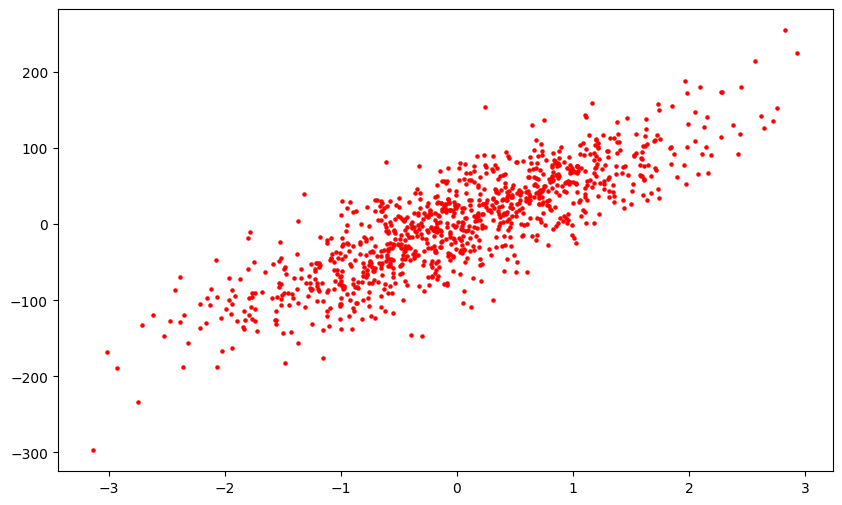

In [186]:
n_samples = 1000
n_features = 10

X, y = make_regression(n_samples=n_samples, n_features=n_features,
                       n_informative=5, noise=10, random_state=42)

X_fit, X_val, y_fit, y_val = train_test_split(X, y, test_size=.2, random_state=1)

fig = plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], y, color="red", marker="o", s=5)
plt.show()

In [151]:
class LinearRegression:
  def __init__(self, lr: int = 0.01, n_iters: int = 1000, tol: float = 1e-6):
    self.lr = lr
    self.n_iters = n_iters
    self.tol = tol
    self.weights = None
    self.bias = None
    self.cost_history = []

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    prev_cost = float("inf")
    for i in range(self.n_iters):
      y_pred = np.dot(X, self.weights) + self.bias

      da = (1 / n_samples) * np.dot(X.T, (y_pred - y))
      db = (1 / n_samples) * (np.sum(y_pred - y))

      self.weights -= self.lr * da
      self.bias -= self.lr * db

      cost = (1 / (2 * n_samples)) * np.sum(np.square(y_pred - y) ** 2)
      self.cost_history.append(cost)

      if i%100 == 0:
        print(f"Iteration : {i}, Cost : {cost}")

      if abs(prev_cost - cost) < self.tol:
        print(f"Converged after {i} iterations")
        break
      prev_cost = cost

    return self

  def predict(self, X):
    return np.dot(X, self.weights) + self.bias

  def plot_cost(self):
        plt.plot(range(len(self.cost_history)), self.cost_history)
        plt.xlabel('Number of iterations')
        plt.ylabel('Cost')
        plt.title('Cost vs. Iterations')
        plt.show()

In [111]:
def mse(y, predictions):
  return np.mean(np.square(y - predictions))

In [187]:
model = LinearRegression()
model.fit(X_fit, y_fit)
predictions = model.predict(X_fit)

Iteration : 0, Cost : 39773815.86905679
Iteration : 100, Cost : 827818.0771733517
Iteration : 200, Cost : 48815.11647364
Iteration : 300, Cost : 17338.7359811945
Iteration : 400, Cost : 14450.890923434867
Iteration : 500, Cost : 14103.432034968047
Iteration : 600, Cost : 14062.822844881965
Iteration : 700, Cost : 14059.869302750138
Iteration : 800, Cost : 14060.63445679649
Iteration : 900, Cost : 14061.269942942401


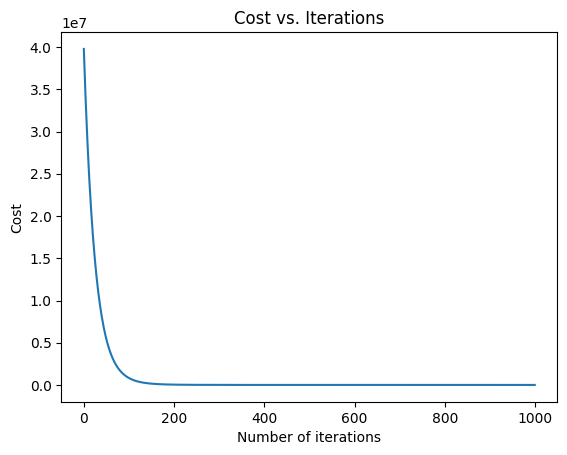

In [188]:
model.plot_cost()

In [189]:
mse(y_fit, predictions)

99.49434712807532

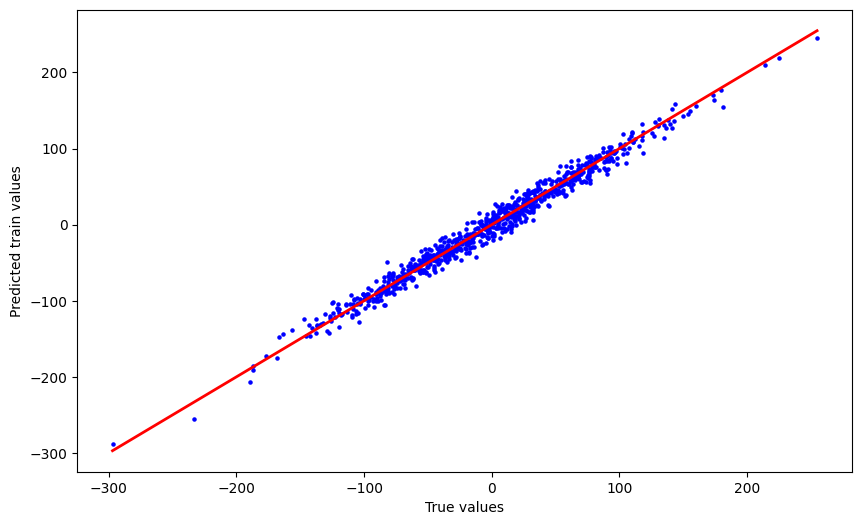

In [190]:
y_pred_train = model.predict(X_fit)

plt.figure(figsize=(10, 6))
plt.scatter(y_fit, y_pred_train, color="blue", s=5)
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linewidth=2)
plt.xlabel("True values")
plt.ylabel("Predicted train values")
plt.show()

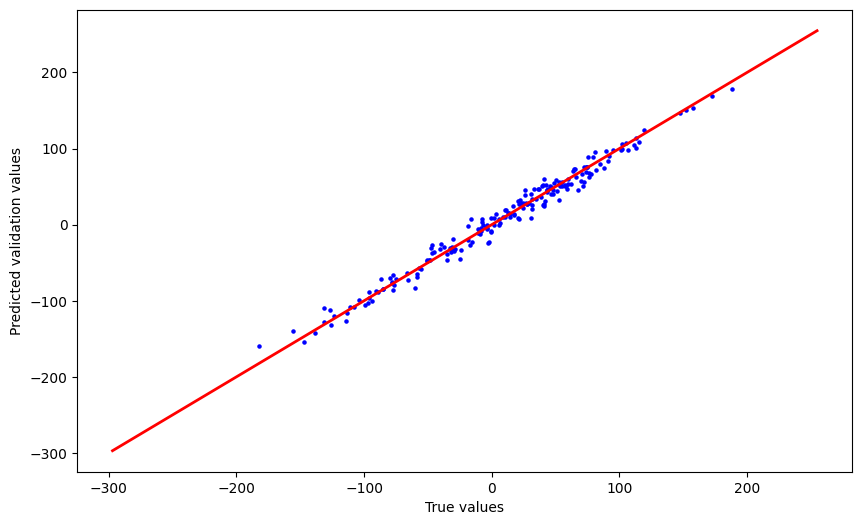

In [191]:
y_pred_train = model.predict(X_val)

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_train, color="blue", s=5)
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linewidth=2)
plt.xlabel("True values")
plt.ylabel("Predicted validation values")
plt.show()